In [1]:
import pandas as pd

df = pd.read_csv('mnist_test.csv')
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
X = df
y = X.pop('label')

In [3]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [4]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()

In [5]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

param_dist = {
    'hidden_layer_sizes': [(50,), (100,), (50,50), (100,50)],
    'activation': ['logistic', 'relu'],
    'solver': ['sgd', 'adam'],
    'max_iter': randint(100, 1000)
}

random_search = RandomizedSearchCV(mlp, param_distributions=param_dist, n_iter=10, cv=5)

In [6]:
random_search.fit(X_train, y_train)

print("Best hyperparameters: ", random_search.best_params_)

/home/thiago/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (426) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/thiago/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (426) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/thiago/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (426) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/thiago/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (426) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/thiago/.local/lib/python3.8/site-packages/skle

Best hyperparameters:  {'activation': 'logistic', 'hidden_layer_sizes': (100,), 'max_iter': 729, 'solver': 'adam'}


In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", conf_matrix)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

precision = precision_score(y_test, y_pred, average='macro')
print("Precision: {:.2f}%".format(precision*100))

recall = recall_score(y_test, y_pred, average='macro')
print("Recall: {:.2f}%".format(recall*100))

f1 = f1_score(y_test, y_pred, average='macro')
print("F1 score: {:.2f}%".format(f1*100))

Confusion matrix:
 [[172   0   1   1   0   0   1   0   4   0]
 [  0 216   0   1   0   0   0   1   1   1]
 [  0   0 207   2   0   0   5   4   7   0]
 [  0   0   5 212   0   3   0   1   3   1]
 [  0   0   1   0 177   0   0   0   4   1]
 [  2   0   2   7   0 134   3   0   6   1]
 [  0   0   1   0   1   4 180   0   2   0]
 [  1   2   5   2   3   0   0 181   1   3]
 [  0   0   2   4   0   3   0   1 175   3]
 [  0   0   1   3   9   1   1   2   0 222]]
Accuracy: 93.80%
Precision: 93.82%
Recall: 93.68%
F1 score: 93.71%


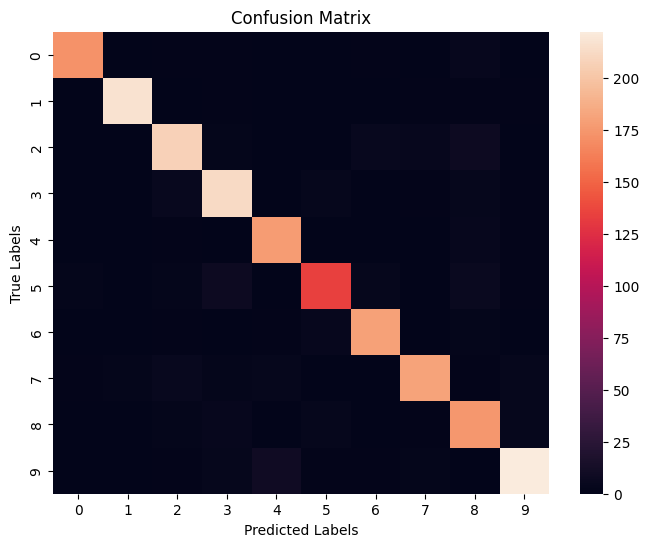

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()